In [53]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import numpy as np

In [121]:
df = pd.read_csv('src/Sheet 1-Table 1.csv')

In [122]:
df['Josh R.'].notna().sum() / len(df['Josh R.'])

0.4744479495268139

In [123]:
df = df[['Date', 'Andrew', 'Josh R.']]
df.rename(columns = {'Date': 'date', 
    'Andrew':'andrew',
    'Josh R.': 'josh'}, inplace = True)

In [124]:
df['date'] = pd.to_datetime(df['date'], format = '%b %d, %Y')

In [125]:
df['josh'] = pd.to_timedelta(df['josh'].str.replace(r'(\d+)h', r'\1 hours').str.replace(r'(\d+)m', r'\1 minutes').str.replace(r'(\d+)s', r'\1 seconds'))
df['andrew'] = pd.to_timedelta(df['andrew'].str.replace(r'(\d+)h', r'\1 hours').str.replace(r'(\d+)m', r'\1 minutes').str.replace(r'(\d+)s', r'\1 seconds'))

/var/folders/5f/_l7w33_x7rx9p0t5x7ly8zj80000gn/T/ipykernel_7948/346332914.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['josh'] = pd.to_timedelta(df['josh'].str.replace(r'(\d+)h', r'\1 hours').str.replace(r'(\d+)m', r'\1 minutes').str.replace(r'(\d+)s', r'\1 seconds'))
/var/folders/5f/_l7w33_x7rx9p0t5x7ly8zj80000gn/T/ipykernel_7948/346332914.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['andrew'] = pd.to_timedelta(df['andrew'].str.replace(r'(\d+)h', r'\1 hours').str.replace(r'(\d+)m', r'\1 minutes').str.replace(r'(\d+)s', r'\1 seconds'))


In [126]:
df['year'] = df['date'].dt.year
df['doy'] = df['date'].dt.day_of_year
df['josh_seconds'] = df['josh'].dt.seconds

past_df = df[df['year'] < 2021]
present_df = df[df['year'] == 2022]


/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for mult

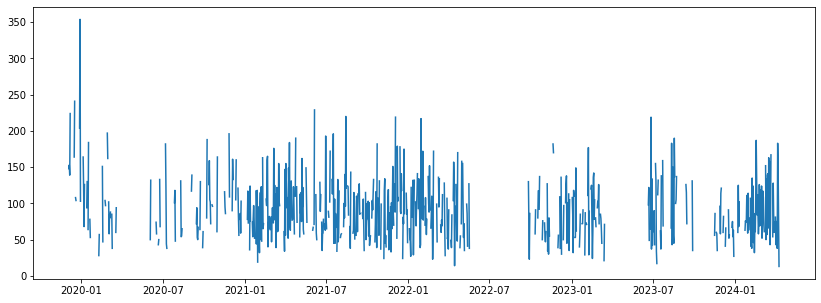

In [45]:
fig, ax = plt.subplots(facecolor='white', figsize=(14,5))
ax.plot(df['date'], df['josh'].dt.seconds)
plt.show()

/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


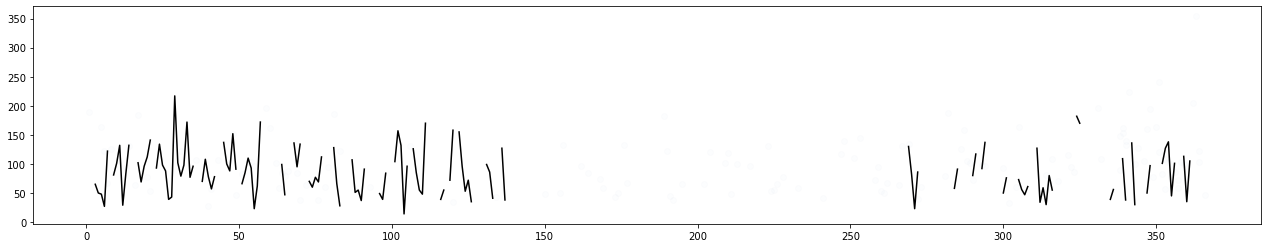

In [57]:
fig, ax = plt.subplots(facecolor='white', figsize=(22,4))
ax.scatter(past_df['doy'], past_df['josh_seconds'],alpha=0.01)
ax.plot(present_df['doy'], present_df['josh_seconds'],color='black')
plt.show()

In [60]:
w_df = df[df['josh'].notna()]

In [62]:
w_df

,date,andrew,josh,year,doy,josh_seconds
0,2019-12-04,0 days 00:03:58,0 days 00:02:28,2019,338,148.0
1,2019-12-05,0 days 00:01:33,0 days 00:02:33,2019,339,153.0
2,2019-12-06,0 days 00:03:14,0 days 00:02:19,2019,340,139.0
3,2019-12-07,0 days 00:02:48,0 days 00:03:44,2019,341,224.0
5,2019-12-09,0 days 00:02:45,0 days 00:01:40,2019,343,100.0
...,...,...,...,...,...,...
1580,2024-04-04,0 days 00:01:41,0 days 00:00:38,2024,95,38.0
1581,2024-04-05,0 days 00:00:53,0 days 00:03:03,2024,96,183.0
1582,2024-04-06,0 days 00:01:07,0 days 00:02:27,2024,97,147.0
1583,2024-04-07,0 days 00:00:58,0 days 00:01:14,2024,98,74.0


In [63]:
import statsmodels.api as sm

In [64]:
X_df = pd.get_dummies(w_df['date'].dt.month, prefix = 'month')
month_vars = list(X_df.columns)
X_df['year'] = w_df['year'] - np.min(w_df['year'])
y = w_df['josh_seconds']

In [66]:
model_1 = sm.GLM(y, X_df[month_vars+['year']]).fit() 
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           josh_seconds   No. Observations:                  752
Model:                            GLM   Df Residuals:                      739
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                          1797.0
Method:                          IRLS   Log-Likelihood:                -3878.2
Date:                Mon, 08 Apr 2024   Deviance:                   1.3280e+06
Time:                        19:09:52   Pearson chi2:                 1.33e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
month_1      103.4793      5.905     17.525      0.000      91.907     115.052
month_2      109.2186      5.975     18.279      0.000      97.508     120.930
month_3      103.6301      6.018     17.221      0.000      91.836     115.425
month_4      106.6807      6.713     15.891      0.000      93.523     119.839
month_5       93.6231      8.418     11.122      0.000      77.124     110.122
month_6       97.3255      7.432     13.095      0.000      82.758     111.893
month_7      105.2082      6.703     15.696      0.000      92.071     118.346
month_8      103.9341      7.186     14.463      0.000      89.850     118.019
month_9       97.9636      6.567     14.917      0.000      85.092     110.835
month_10     101.6174      6.345     16.015      0.000      89.181     114.054
month_11      95.7835      6.520     14.692      0.000      83.005     108.562
month_12     113.2093      5.257     21.537      0.000     102.907     123.512
year          -4.9562      1.291     -3.839      0.000      -7.486      -2.426
==============================================================================
"""

In [67]:
i_df = (X_df[month_vars] * np.matrix(X_df['year']).T)
i_df.columns = [col+"_i" for col in list(i_df.columns)]

for m in month_vars:
    X_df[m+"_i"] = X_df[m] * X_df['year']

i_vars = [col+"_i" for col in month_vars]

In [69]:
m3_df = X_df[month_vars+i_vars+['year']]
model_3 = sm.GLM(y, m3_df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           josh_seconds   No. Observations:                  752
Model:                            GLM   Df Residuals:                      728
Model Family:                Gaussian   Df Model:                           23
Link Function:               identity   Scale:                          1758.0
Method:                          IRLS   Log-Likelihood:                -3859.4
Date:                Mon, 08 Apr 2024   Deviance:                   1.2634e+06
Time:                        19:17:49   Pearson chi2:                 1.26e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
month_1      108.9823     11.174      9.753      0.000      87.082     130.883
month_2      101.7512     10.866      9.364      0.000      80.454     123.049
month_3       82.1278     10.529      7.800      0.000      61.491     102.764
month_4      111.0857     15.278      7.271      0.000      81.141     141.030
month_5       82.2973     31.305      2.629      0.009      20.941     143.653
month_6       77.1003     15.727      4.902      0.000      46.276     107.925
month_7       98.3927     13.733      7.165      0.000      71.477     125.308
month_8       64.9569     15.496      4.192      0.000      34.586      95.328
month_9      100.5366     14.016      7.173      0.000      73.065     128.008
month_10     110.2846     14.599      7.554      0.000      81.671     138.898
month_11     108.8429     15.848      6.868      0.000      77.782     139.904
month_12     143.3527      8.175     17.534      0.000     127.329     159.376
month_1_i     -3.1820      3.501     -0.909      0.363     -10.043       3.679
month_2_i      0.8869      3.241      0.274      0.784      -5.466       7.239
month_3_i      5.5069      3.251      1.694      0.090      -0.865      11.879
month_4_i     -2.9952      5.056     -0.592      0.554     -12.904       6.914
month_5_i      3.5222     12.181      0.289      0.772     -20.353      27.397
month_6_i      7.8797      6.189      1.273      0.203      -4.251      20.010
month_7_i      1.4459      5.006      0.289      0.773      -8.366      11.258
month_8_i     13.9325      5.365      2.597      0.009       3.418      24.447
month_9_i     -2.5622      5.619     -0.456      0.648     -13.576       8.451
month_10_i    -5.2942      5.831     -0.908      0.364     -16.724       6.135
month_11_i    -6.6037      5.691     -1.160      0.246     -17.759       4.551
month_12_i   -16.1130      3.474     -4.638      0.000     -22.922      -9.304
year          -3.5763      1.625     -2.200      0.028      -6.762      -0.391
==============================================================================
"""

In [70]:
import datetime
def get_month_abv(m):
    month_num = str(m)
    datetime_object = datetime.datetime.strptime(month_num, "%m")
    month_name = datetime_object.strftime("%b")
    return month_name


/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for mult

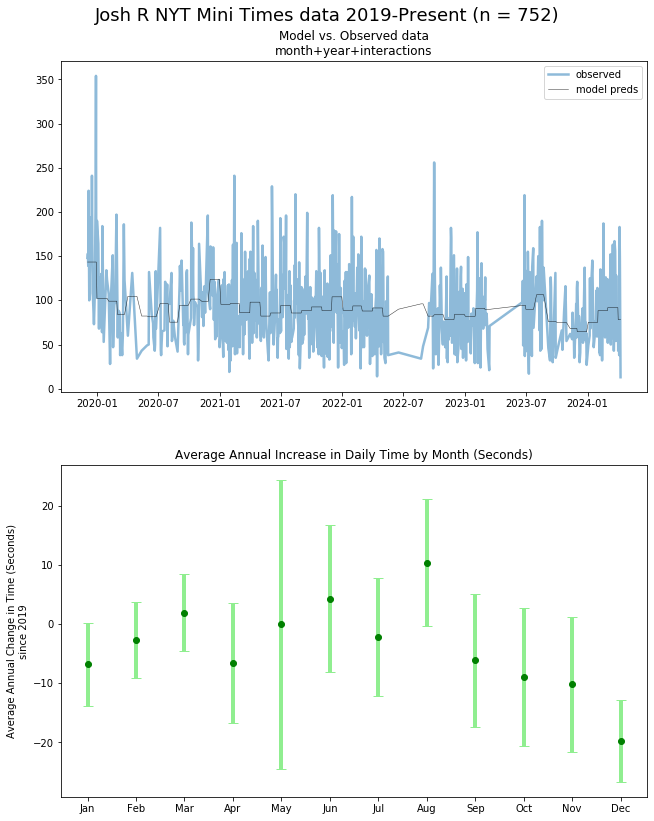

In [132]:
fig, ax = plt.subplots(2,1,facecolor='white', figsize=(10,12))

ax[0].plot(w_df['date'], w_df['josh_seconds'],alpha=0.5,
           label='observed',linewidth=2.5)
ax[0].plot(w_df['date'], model_3.predict(m3_df),
           color='black', alpha=0.8, linewidth=0.5,
           label='model preds')
ax[0].legend()
ax[0].set_title("Model vs. Observed data\nmonth+year+interactions")

ax[1].errorbar([get_month_abv(m) for m in range(1,13)],
            model_3.params[i_vars]+model_3.params['year'],
            model_3.bse[i_vars]*2, fmt='o', color='green',
             ecolor='lightgreen', elinewidth=4, capsize=5)
ax[1].set_ylabel("Average Annual Change in Time (Seconds)\nsince 2019")
ax[1].set_title("Average Annual Increase in Daily Time by Month (Seconds)")
fig.tight_layout(pad=4.0)
fig.suptitle("Josh R NYT Mini Times data 2019-Present (n = 752)",
            size=18)
plt.show()

In [127]:
temp_df = pd.read_csv('src/3654196.csv')
temp_df['DATE'] = pd.to_datetime(temp_df['DATE'])

In [128]:
df = df.merge(temp_df[['TMAX', 'DATE']], left_on = 'date', right_on = 'DATE')

In [129]:
df[df['josh_seconds'].notna()].corr()

,year,doy,josh_seconds,TMAX
year,NaN,NaN,NaN,NaN
doy,NaN,1.000000,0.167601,0.452303
josh_seconds,NaN,0.167601,1.000000,-0.001070
TMAX,NaN,0.452303,-0.001070,1.000000


In [130]:
X_temp = df[(df['josh_seconds'].notna()) & (df['TMAX'].notna())]['TMAX']
X_temp['const'] = 1.0
y_temp = df[(df['josh_seconds'].notna()) & (df['TMAX'].notna())]['josh_seconds']

model_1 = sm.GLM(y_temp, X_temp).fit() 
model_1.summary()

/opt/anaconda3/envs/personal_env/lib/python3.9/site-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
/var/folders/5f/_l7w33_x7rx9p0t5x7ly8zj80000gn/T/ipykernel_7948/2702411817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_temp['const'] = 1.0


ValueError: The indices for endog and exog are not aligned

In [131]:
X_temp

2        36.0
6        34.0
7        36.0
8        36.0
9        34.0
         ... 
92       45.0
93       39.0
94       45.0
95       49.0
const     1.0
Name: TMAX, Length: 76, dtype: float64